# small-data-set-1-non-paired

Author: [Lucas David](http://github.com/lucasdavid)  
This notebook can be downloaded at https://github.com/lucasdavid/mo850/

In [4]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib
import numpy as np
from matplotlib import pyplot

%matplotlib inline

def plot_distribution_and_histogram(d, label, i, bins=9):
    pyplot.subplot(6, 2, i)
    dh, = pyplot.plot(d, label=label, c='crimson', linewidth=5.)
    pyplot.title(label)
    pyplot.grid(False), pyplot.axis('off')
    
    pyplot.subplot(6, 2, i + 1)
    count, bins, ignored = pyplot.hist(d, bins=bins)
    pyplot.title(label + ' histogram')
    pyplot.grid(False), pyplot.axis('off')

In [5]:
a1, b1 = '../data/a1.csv', '../data/b1.csv'
a1, b1 = (pd.read_csv(d, header=None).values for d in (a1, b1))
g = np.random.normal(size=max(len(a1), len(b1)))

print('a1:', a1.mean(), a1.std())
print('b1:', b1.mean(), b1.std())
print('g:', g.mean(), g.std())

a1: 7.995025006588539 4.874042455416288
b1: 5.064099812088535 2.8397393721530735
g: 0.3224751194786501 0.9743616089751528


In [6]:
s, p = (e[0] for e in stats.ttest_ind(a1, b1, equal_var=True))
print('p-value from pared t-test:', p)

s, p = (e[0] for e in stats.ttest_ind(a1, b1, equal_var=False))
print('p-value from Wetch\'s test:', p)

s, p = stats.ranksums(a1, b1)
print('p-value from Wilcoxon rank sum test:', p)

p-value from pared t-test: 0.0375853561701041
p-value from Wetch's test: 0.057238709334717516
p-value from Wilcoxon rank sum test: 0.06675301516963451


Note: it doesn't really make sense to use `ttest_ind(..., equal_var=True)` (standard independent 2 sample test) here, because `a1` and `b1` don't share the same `std` and, therefore, the same `variance`.

**Plot the two histograms and discuss whether the data is "gaussian like"**

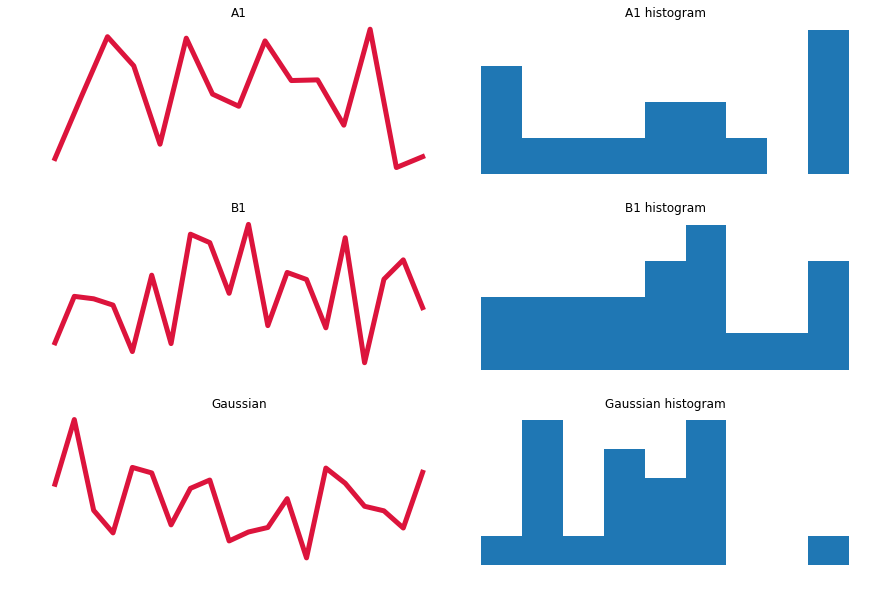

In [7]:
pyplot.figure(figsize=(12, 16))
plot_distribution_and_histogram(a1, 'A1', 1)
plot_distribution_and_histogram(b1, 'B1', 3)
plot_distribution_and_histogram(g, 'Gaussian', 5)
pyplot.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
pyplot.show()

A1 doesn't look gaussian. B1 does, but how trustworthy are 17 samples? I'd imagine these distrubutions are non-parametric and, therefore, would prefer `ranksums`.

# small-data-set-2-paired

## Small data set 1

In [8]:
d = pd.read_csv('../data/paired.csv', header=None, names=['a', 'b'])
metrics = pd.concat((d.mean(), d.std()), axis=1)
metrics.columns = ['mean', 'std']
print(metrics)

    mean       std
a  14.48  2.392953
b  13.10  1.455259


In [9]:
s, p = stats.ttest_rel(d['a'], d['b'])
print('p-value from paired t-test:', p)

s, p = stats.ttest_ind(d['a'], d['b'])
print('p-value from t-test:', p)

s, p = stats.wilcoxon(d['a'], d['b'])
print('p-value from Wilcoxon signed rank-test:', p)

s, p = stats.ranksums(d['a'], d['b'])
print('p-value from Wilcoxon rank sums test:', p)

p-value from paired t-test: 0.004650123707777353
p-value from t-test: 0.1366049915156075
p-value from Wilcoxon signed rank-test: 0.012515318690073973
p-value from Wilcoxon rank sums test: 0.18587673236587576


**Does the result correspond to what we discussed in class?**

Non-pared versions returned less strict `p-values`, as they were supposed to. I assumed, however, this difference would not be so expressive:
```
0.5% to 14.0%
1.3% to 18.6%
```

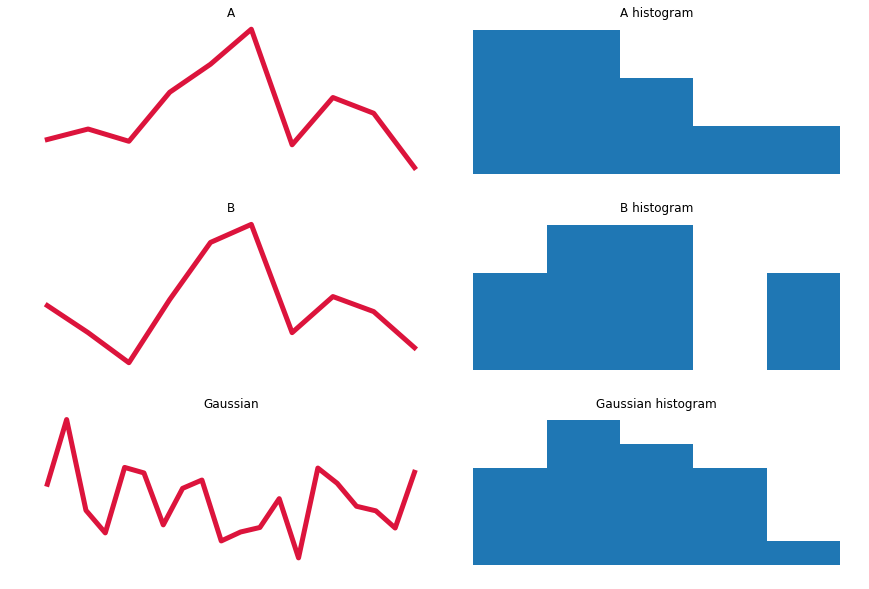

In [10]:
pyplot.figure(figsize=(12, 16))
plot_distribution_and_histogram(d['a'], 'A', 1, bins=5)
plot_distribution_and_histogram(d['b'], 'B', 3, bins=5)
plot_distribution_and_histogram(g, 'Gaussian', 5, bins=5)
pyplot.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
pyplot.show()

**Run the sign test:**

In [11]:
successes = (d['a'] > d['b']).sum()
print('successes:', successes)
print('sign test:', stats.binom_test(successes, n=10))

successes: 8
sign test: 0.10937500000000003


**How does the sign test compares with the other two?**

It resulted in a worse `p-value`.

## Study on the factors that impact the p-value

In [12]:
def generate_random_normals(size, mean, std=5):
    gs = np.asarray([[np.random.normal(m, std, size=size)
                      for m in mean]
                     for _ in range(10)])

    print('g1\'s mean and std:', gs[:, 0].mean(), gs[:, 0].std())
    print('g2\'s mean and std:', gs[:, 1].mean(), gs[:, 1].std())
    
    return gs

In [13]:
gs = generate_random_normals(15, (10, 13))
ps = np.asarray([stats.ttest_rel(g1, g2)[1] for g1, g2 in gs])
print('mean p-value from paired t-test:', ps.mean())

g1's mean and std: 9.970299910408787 5.088874353842971
g2's mean and std: 13.075961798041238 5.15849447603515
mean p-value from paired t-test: 0.21778682958123893


In [14]:
gs = generate_random_normals(25, (10, 13))
ps = np.asarray([stats.ttest_rel(g1, g2)[1] for g1, g2 in gs])
print('mean p-value from paired t-test:', ps.mean())

g1's mean and std: 10.276629060852475 4.972538580047067
g2's mean and std: 13.211027755539108 5.138297911104183
mean p-value from paired t-test: 0.06839440418354273


**What happens to the average p-value?** It got a little lower. Larger sets induce greater confidence.

In [15]:
gs = generate_random_normals(15, (10, 17))
t, p = stats.ttest_rel(gs[:, 0], gs[:, 1], axis=1)
print('mean p-value from paired t-test:', p.mean())

g1's mean and std: 10.701748709685083 4.6731245510200585
g2's mean and std: 17.385378829690957 4.758944498635787
mean p-value from paired t-test: 0.0028532856240703


**What happens to the average p-value?** It got smaller, because 17 is farther from 10 than 13.

In [16]:
gs = generate_random_normals(15, (10, 13), std=8)
t, p = stats.ttest_rel(gs[:, 0], gs[:, 1], axis=1)
print('mean p-value from paired t-test:', p.mean())

g1's mean and std: 9.82226906664053 7.572959886334393
g2's mean and std: 12.383745015862123 7.8303726037038395
mean p-value from paired t-test: 0.41882501759796414


**What happens to the average p-value?** It became much larger. Greater deviations reduce confidence.